In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
np.random.seed = 12345

In [2]:
def circle(radius,num_pts,std):
    lp = np.linspace(0,2 * np.pi,num_pts+1)[:-1]
    x = np.cos(lp) * radius
    y = np.sin(lp) * radius
    x += np.random.normal(0,std,x.shape[0])
    #y += np.random.normal(0,std,x.shape[0])
    
    return x,y
    
    

In [15]:
num_pts = 100
x1,y1 = circle(1,num_pts,.1)
x2,y2 = circle(3,num_pts,.3)
x3,y3 = circle(6,num_pts,1.0)

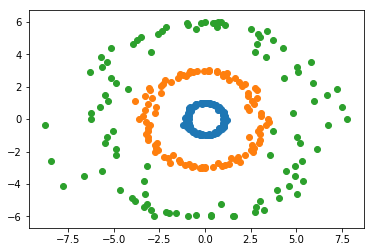

In [16]:
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show()

In [25]:
X = np.hstack((x1,x2,x3))
Y = np.hstack((y1,y2,y3))

In [26]:
X = np.vstack((X,Y)).transpose()
X

array([[ 9.58049532e-01,  0.00000000e+00],
       [ 1.03236410e+00,  6.27905195e-02],
       [ 1.09556031e+00,  1.25333234e-01],
       [ 1.10219289e+00,  1.87381315e-01],
       [ 9.95957012e-01,  2.48689887e-01],
       [ 9.60407723e-01,  3.09016994e-01],
       [ 1.01542838e+00,  3.68124553e-01],
       [ 1.02347941e+00,  4.25779292e-01],
       [ 9.48599937e-01,  4.81753674e-01],
       [ 8.57121833e-01,  5.35826795e-01],
       [ 7.27636322e-01,  5.87785252e-01],
       [ 8.96693409e-01,  6.37423990e-01],
       [ 7.06752531e-01,  6.84547106e-01],
       [ 7.80724458e-01,  7.28968627e-01],
       [ 7.37114499e-01,  7.70513243e-01],
       [ 5.73490127e-01,  8.09016994e-01],
       [ 6.06646019e-01,  8.44327926e-01],
       [ 5.12600271e-01,  8.76306680e-01],
       [ 4.60749526e-01,  9.04827052e-01],
       [ 4.17288455e-01,  9.29776486e-01],
       [ 2.61439814e-01,  9.51056516e-01],
       [ 2.84549893e-01,  9.68583161e-01],
       [ 1.49925314e-01,  9.82287251e-01],
       [-3.

In [27]:
X.shape

(300, 2)

In [28]:
#plt.scatter(X[:,0],X[:,1])

colors = ['b','g','m','c','y','r','k']
for i in range(int((pc1.shape[0]/num_pts))):
    s = i * num_pts
    e = s + num_pts
    print(s,e)
    plt.scatter(X[s:e,0],X[s:e,1],color=colors[i])
plt.show()

NameError: name 'pc1' is not defined

## square euclidean distance between all pairs of points

In [9]:
print(X.shape)
dist = np.zeros((X.shape[0],X.shape[0]))
for i in range(X.shape[0]):
    d = np.sqrt(((X[i,:] - X[i+1:,:])**2).sum(axis=1))
    dist[i,i+1:] = d
    dist[i+1:,i] = d

(300, 2)


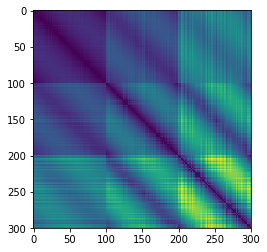

In [10]:
plt.imshow(dist)
plt.show()

In [11]:
var = np.var(np.ma.masked_where(dist==0,dist))
var

7.290172123610112

## gaussian kernel

In [12]:
gamma = 5
K = np.exp(-gamma * dist / (2.0 * var))
K

array([[1.        , 0.94325708, 0.9564586 , ..., 0.1302793 , 0.17374029,
        0.22768878],
       [0.94325708, 1.        , 0.93304283, ..., 0.12300887, 0.16412521,
        0.21527432],
       [0.9564586 , 0.93304283, 1.        , ..., 0.13064125, 0.17453771,
        0.22932252],
       ...,
       [0.1302793 , 0.12300887, 0.13064125, ..., 1.        , 0.74168665,
        0.55645029],
       [0.17374029, 0.16412521, 0.17453771, ..., 0.74168665, 1.        ,
        0.75022114],
       [0.22768878, 0.21527432, 0.22932252, ..., 0.55645029, 0.75022114,
        1.        ]])

## center the kernal matrix  
  
$\mathbf{C} = \frac{1}{n}\Sigma_{i,j}\mathbf{K}_{i,j}$  
  
$\mathbf{K} \leftarrow \mathbf{K} - \frac{\mathbf{K}\mathbf{e}\mathbf{e}^T}{n} - \frac{\mathbf{e}\mathbf{e}^T\mathbf{K}}{n} + \mathbf{C}\frac{\mathbf{e}\mathbf{e}^T}{n}$  
where  
$\mathbf{e}$ vector of ones of shape $n$

In [13]:
def kernel_center(K):
    n = K.shape[0]
    e = np.ones((n,1))
    eet = np.dot(e,e.transpose())
    C = K.sum()/n
    first_term = np.dot(K,eet) / n
    second_term = np.dot(eet,K) / n
    third_term = np.dot(C,eet/n)
    return K - first_term - second_term + third_term

    

In [14]:
Kc = kernel_center(K)

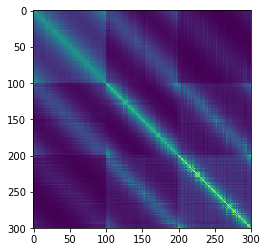

In [15]:
plt.imshow(Kc)
plt.show()

In [16]:
Kc.mean(),K.mean()

(6.355410025409785e-18, 0.26774289136288587)

In [17]:
evals,evecs = np.linalg.eigh(Kc)
evecs.shape

(300, 300)

(300,) (300,)
0 100
100 200
200 300


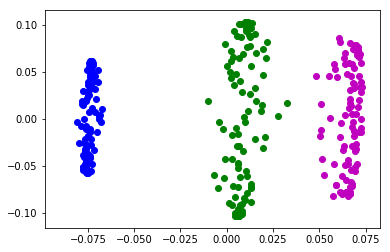

In [18]:
pc1,pc2 = evecs[:,-1],evecs[:,-2]
print(pc1.shape,pc2.shape)
colors = ['b','g','m','c','y','r','k']
for i in range(int((pc1.shape[0]/num_pts))):
    s = i * num_pts
    e = s + num_pts
    print(s,e)
    plt.scatter(pc1[s:e],pc2[s:e],color=colors[i])
#plt.scatter(pc1[100:],pc2[100:],color='g')
#plt.show()

## draws in feature space

In [90]:
num_reals = 10

In [100]:
snd = np.random.randn(K.shape[0],num_reals)
snd.shape

(300, 10)

In [101]:
evals.shape

(300,)

In [104]:
trunc = 6
#proj_mat = np.dot(evecs[:,:trunc],np.diag(np.sqrt(evals[:trunc])))
proj_mat = np.dot(evecs,np.diag(np.sqrt(evals)))

In [105]:
proj_reals = np.dot(proj_mat,snd)